### **Traveling Salesman Problem Via Dynamic Programming**

We demonstrate the use of the code `core.py` and visualize some of the solutions for the Traveling Salesman problem. The algorithm is build without any python packages for the core algorithm part. For the complexity analysis of the algorithm, please read the report.

In [18]:
import sys
sys.path.insert(0,'.')
import core, itertools
core.VERBOSE = False  # Change the settings here if you don't want the printout.

### **How to Use**

`core.SimpleEuclideanPoints` provide interface for plotting and making euclidean points.
* It's implemented in `core.py`.
* Start by making an instance of it and specify the number of points you want: `core.SimpleEuclideanPoints(5)` set up 5 points.
* Then tell it what type of points you want, current we have 2 options, `.random_pts()` where it generates random points in the unit square, and `.circle()` where it generates points equally spaced on the unit circle.
* Then we pass the `.c` of the instance to the core solver constructor: `DynamicTSP`, they exchange information on all pairwise distances for all points.
* To call on the solver, use `.perform_all()` on the `DynamicTSP` instance.
* Below is an example using random points:


120it [00:00, 27668.43it/s]
210it [00:00, 15226.18it/s]
252it [00:00, 9013.47it/s]
210it [00:00, 5674.95it/s]
120it [00:00, 3256.97it/s]
45it [00:00, 2022.39it/s]
10it [00:00, 1579.78it/s]
1it [00:00, 1043.62it/s]


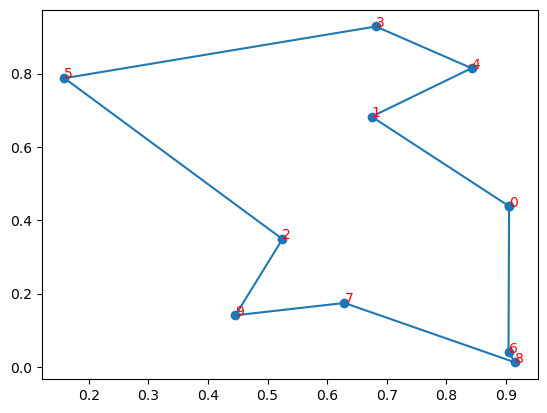

All spanning path at the last iterations sorted:
[0, 1, 2, 4, 3, 5, 9, 7, 6, 8]|-> 2.4228096951616465
[0, 1, 2, 4, 3, 5, 9, 7, 8, 6]|-> 2.445834300292469
[0, 1, 6, 8, 7, 9, 2, 4, 3, 5]|-> 2.453773560501616
[0, 1, 6, 8, 7, 2, 4, 3, 5, 9]|-> 2.470901630711491
[0, 6, 8, 7, 9, 2, 1, 4, 3, 5]|-> 2.483906065098654
[0, 1, 6, 8, 7, 9, 2, 4, 3, 5]|-> 2.4839386905082135
[0, 1, 6, 8, 7, 9, 2, 3, 4, 5]|-> 2.516595241927177
[0, 4, 3, 1, 6, 8, 7, 9, 2, 5]|-> 2.562502084037148
[0, 1, 4, 3, 5, 2, 9, 7, 6, 8]|-> 2.6036694906030013
[0, 1, 4, 3, 5, 2, 9, 7, 8, 6]|-> 2.626694095733824
[0, 1, 6, 8, 9, 2, 4, 3, 5, 7]|-> 2.6282972630150225
[0, 6, 8, 7, 9, 2, 5, 1, 4, 3]|-> 2.6740695092762077
[0, 1, 4, 3, 5, 2, 6, 7, 8, 9]|-> 2.676570561929172
[0, 6, 8, 7, 9, 2, 5, 3, 4, 1]|-> 2.689299366970537
[0, 1, 4, 3, 5, 2, 6, 9, 7, 8]|-> 2.6958688322930375
[0, 1, 4, 3, 5, 2, 8, 6, 7, 9]|-> 2.7044726457471193
[0, 6, 8, 7, 9, 2, 5, 1, 3, 4]|-> 2.7067260606951717
[0, 1, 4, 3, 5, 2, 8, 6, 9, 7]|-> 2.723770916110985
[0, 7, 

In [19]:
N = 10 # This is the number of cities.
if N > 15:
    raise Exception("Too many cities, I don't recommend running that using this algorithm. ")
seup = core.SimpleEuclideanPoints(N)
seup.random_pts()
dtsp = core.DynamicTSP(seup.c)
soln, opt = dtsp.perform_all()
edges = itertools.pairwise(soln)
seup.visualize_subgraph(list(edges))
print("All spanning path at the last iterations sorted:")
p2c = []
for S, e in dtsp.ctable.keys():
    p2c.append((dtsp.ptable[S, e], dtsp.ctable[S, e]))
p2c = sorted(p2c, key=lambda x: x[1])
for p, c in p2c:
    print(f"{p}|-> {c}")
print(f"The optimal tour has a total length of: {opt}")


### Counter Intuitive Instances

It's possible that due to numerical error, the solutions in the end is not exactly the correct answer, but the error is usually small because there are only a few cities. However, in the case of the only 4 cities, we can have solutions that are counterintuitive but it's actually correct. Below is one of such example.

4it [00:00, 33420.75it/s]
1it [00:00, 10866.07it/s]


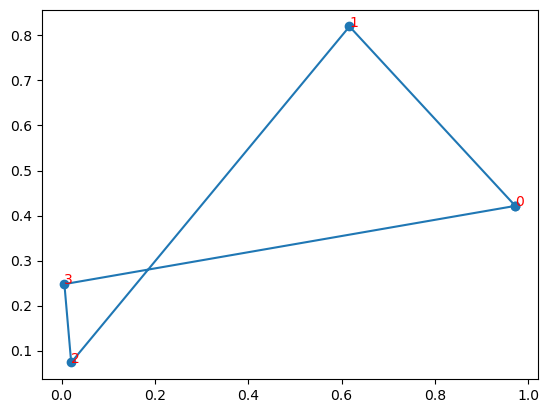

All spanning path at the last iterations sorted:
[0, 1, 3, 2]|-> 1.545705568492525
[0, 1, 2, 3]|-> 1.6639629345864888
[0, 1, 3, 2]|-> 1.6902790264029801
[0, 1, 2, 3]|-> 1.721782168124212
[0, 2, 3, 1]|-> 2.0249108387469366
[0, 1, 2, 3]|-> 2.384169695357037


In [20]:
cost_table = {(0, 1): 0.5339452514933004,
                       (0, 2): 1.013150521747712,
                       (0, 3): 0.98164738002648,
                       (1, 2): 0.9553312882099887,
                       (1, 3): 0.8370739221160245,
                       (2, 3): 0.17468639488319992}
vlabels = {0: (0.972338856500168, 0.4213938625617548),
 1: (0.6170289875121588, 0.8199568169265171),
 2: (0.020776902528420016, 0.07353781838380813),
 3: (0.006195829011062415, 0.24761460848625305)}
dtsp = core.DynamicTSP(cost_table)
soln, _ = dtsp.perform_all()
edges = itertools.pairwise(soln)
seup = core.SimpleEuclideanPoints(4)
seup.vlabels = vlabels
seup.v = list(range(4))
seup.visualize_subgraph(edges)
print("All spanning path at the last iterations sorted:")
p2c = []
for S, e in dtsp.ctable.keys():
    p2c.append((dtsp.ptable[S, e], dtsp.ctable[S, e]))
p2c = sorted(p2c, key=lambda x: x[1])
for p, c in p2c:
    print(f"{p}|-> {c}")

One will be tempted to think that we had the incorrect solution, and the correct solution is the convex hull of the 4 vertices: `[0, 2, 3, 1]`, however this is not true and the above solution is indeed correct, below we write code to compute the distances using the distance matrix `c` that is defined in the above cell:

In [21]:
def sum_up_tour(tour, c):
    cost = 0
    for v1, v2 in itertools.pairwise(tour):
        cost += c[tuple(sorted([v1, v2]))]
    return cost
print(f"The cost for the tour [0, 2, 3, 1] is {sum_up_tour([0, 2, 3, 1], cost_table)}")
print(f"The cost of the tour [0, 1, 2, 3] is {sum_up_tour([0, 3, 2, 1], cost_table)}")

The cost for the tour [0, 2, 3, 1] is 2.0249108387469366
The cost of the tour [0, 1, 2, 3] is 2.111665063119669
